In [1]:
import ROOT

Welcome to JupyROOT 6.26/00


## Estructura:


Se aplicaron los cortes siguiendo la siguiente secuencia:

1. Requerir una buena reconstrucción de vertices: Carpeta NRecoVertex.
2. Requerir el trigger (IsoMu27): Carpeta NRecoTriggers1.
3. Requerir un muon: Carpeta NRecoMuon1.
4. Veto en electrones: Carpeta NRecoElectron1.
5. Veto en taus: Carpeta NRecoTau1.
6. Corte del MET: METCut.


Los eventos que pasan un corte son la entrada del siguiente corte.Al leer los histogramas de cada carpeta pueden ver como va evolucionando la región de control.


Los resultados entregados previamente corresponden a lo almacenado en la tabla METCut.

In [16]:
%%cpp

#include <TMath.h>

// Indicar el histograma que desean usar. No olvidar que se debe especificar el folder del cuál se leerá la información.
TString Histogram("METCut/Muon1Eta");


TFile *SR0 = new TFile("Data.root");
    TH1F *Data_M = (TH1F*)SR0->Get(Histogram);
    
TFile *SR1 = new TFile("DY+Jets.root");
    TH1F *DY_entry = (TH1F*)SR1->Get(Histogram);
    
TFile *SR2 = new TFile("W+Jets.root");
    TH1F *WJ_entry = (TH1F*)SR2->Get(Histogram);
    
TFile *SR3 = new TFile("tbar{t}.root");
    TH1F *TT_entry = (TH1F*)SR3->Get(Histogram);
    
TFile *SR4 = new TFile("SingleTop.root");
    TH1F *ST_entry = (TH1F*)SR4->Get(Histogram);
    
TFile *SR5 = new TFile("VV.root");
    TH1F *VV_entry = (TH1F*)SR5->Get(Histogram);
    
TFile *SR6 = new TFile("Higgs.root");
    TH1F *Higgs_entry = (TH1F*)SR6->Get(Histogram);


In [17]:
%%cpp


int nb = Data_M->GetXaxis()->GetNbins();


Double_t error_data;
Double_t data = Data_M->IntegralAndError(0, nb+1, error_data, ""); 


Double_t error_dy;
Double_t dy = DY_entry->IntegralAndError(0, nb+1, error_dy, ""); 

    
Double_t error_wj;
Double_t wj = WJ_entry->IntegralAndError(0, nb+1, error_wj, ""); 


Double_t error_tt;
Double_t tt = TT_entry->IntegralAndError(0, nb+1, error_tt, ""); 

    
Double_t error_st;
Double_t st = ST_entry->IntegralAndError(0, nb+1, error_st, ""); 

    
Double_t error_vv;
Double_t vv = VV_entry->IntegralAndError(0, nb+1, error_vv, "");


Double_t error_higgs;
Double_t higgs = Higgs_entry->IntegralAndError(0, nb+1, error_higgs, ""); 


  
double error_background = TMath::Sqrt(TMath::Power(error_dy,2) + TMath::Power(error_wj,2) + TMath::Power(error_tt,2) + TMath::Power(error_st,2) + TMath::Power(error_vv,2) + TMath::Power(error_higgs,2)); 
double background = dy + wj + tt + st + vv + higgs;

double ratio = data/background;
error_ratio = ratio*TMath::Sqrt(TMath::Power((TMath::Sqrt(data)/data),2) + TMath::Power(error_background/background,2));
        
        
// ---------------------------------- 
// Resultados
// ----------------------------------

cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << "La siguiente tabla muestra los resultados que se obtienen al leer los histogramas" << endl;
cout << ":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::" << endl;
cout << endl;

cout << "TT:   " << "\t\t" << tt << " +- "<< error_tt << "\t\t" << (tt/background)* 100 << " %" << endl;
cout << "ST:   " << "\t\t" << st << " +- "<< error_st << "\t\t" << (st/background)* 100 << " %" << endl;
cout << "WJ:   " << "\t\t" << wj << " +- "<< error_wj << "\t\t" << (wj/background)* 100 << " %" << endl;
cout << "DY:   " << "\t\t" << dy << " +- "<< error_dy << "\t\t" << (dy/background)* 100 << " %" << endl;
cout << "VV:   " << "\t\t" << vv << " +- "<< error_vv << "\t\t" << (vv/background)* 100 << " %" << endl;
cout << "Higgs:" << "\t\t" << higgs << " +- "<< error_higgs << "\t\t" << (higgs/background)* 100 << " %" << endl;
cout << "----------------------------------------------------------------" << endl;
cout << "Data: " << "\t\t" << data << " +- " << " ... " << "\t\t" << " ... " << endl;
cout << "Back: " << "\t\t" << background << " +- " << error_background << "\t\t" << (background/background)* 100 << " %" << endl;
cout << "----------------------------------------------------------------" << endl;

cout << "Data/Back:" << "\t" << ratio << " +- " << error_ratio << endl;

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
La siguiente tabla muestra los resultados que se obtienen al leer los histogramas
:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

TT:   		789179 +- 171.304		88.983 %
ST:   		59722.5 +- 92.5657		6.73395 %
WJ:   		30784.4 +- 144.992		3.47106 %
DY:   		5643.5 +- 34.3394		0.636327 %
VV:   		1314.95 +- 16.4811		0.148266 %
Higgs:		243.128 +- 24.7286		0.0274137 %
----------------------------------------------------------------
Data: 		956527 +-  ... 		 ... 
Back: 		886887 +- 246.979		100 %
----------------------------------------------------------------
Data/Back:	1.07852 +- 0.00114293


### Resultados entregados (solo cambie el orden de los backgrounds)

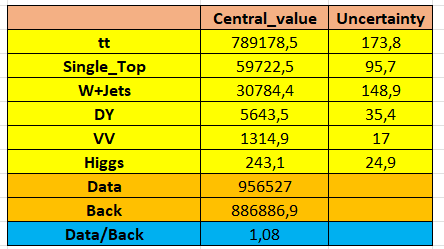


### Resultados de la gráfica de eta: Histograms = "METCut/Muon1Pt"

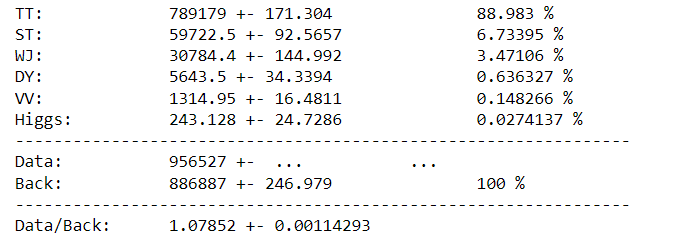


### Resultados de la gráfica de eta: Histograms = "METCut/Muon1Eta"

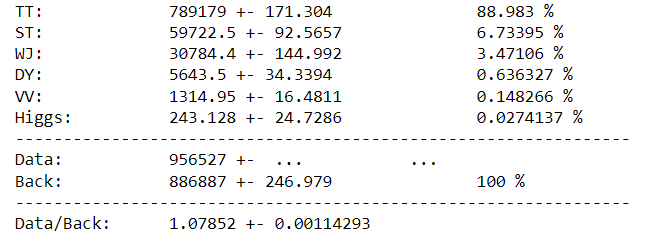



##### Probando Histograms = "NRecoTau1/Muon1Eta"

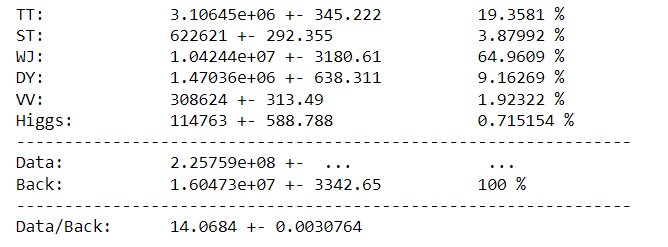